In [4]:
from urllib.request import urlretrieve
import pandas as pd
from IPython.display import display

In [5]:
covid_df =pd.read_csv("./italy-covid-daywise.csv")
type(covid_df)

pandas.core.frame.DataFrame

In [6]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [7]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [8]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [9]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [10]:
covid_df.shape

(248, 4)

In [11]:
covid_data_dict={
    "date": ["2020-08-30", "2020-08-31", "2020-09-01", "2020-09-02", "2020-09-03"],
    "new_cases": [1444.0, 244, 245, 246, 247],
    "new_deaths": [1.0, 4.0, 6.0, 8.0, 6.0],
    "new_tests": [53541.0, 42583.0, 54395.0, None, None]
}

In [12]:
covid_data_dict["new_cases"]

[1444.0, 244, 245, 246, 247]

In [13]:
#covid_df["new_cases"]
covid_df.new_cases

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [14]:
cases_df = covid_df[["date", "new_cases"]]
cases_df

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0


In [15]:
covid_df_copy=covid_df.copy()
covid_df_copy

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [16]:
covid_df.head()
covid_df.tail(3)

,date,new_cases,new_deaths,new_tests
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


In [17]:
covid_df.new_tests.first_valid_index()

111

In [18]:
covid_df.loc[108:113]

,date,new_cases,new_deaths,new_tests
108,2020-04-17,3786.0,525.0,NaN
109,2020-04-18,3493.0,575.0,NaN
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0


In [19]:
covid_df.sample(10)

,date,new_cases,new_deaths,new_tests
12,2020-01-12,0.0,0.0,NaN
234,2020-08-21,840.0,6.0,44943.0
129,2020-05-08,1401.0,274.0,45428.0
242,2020-08-29,1460.0,9.0,64294.0
136,2020-05-15,992.0,262.0,39027.0
41,2020-02-10,0.0,0.0,NaN
197,2020-07-15,114.0,17.0,28392.0
91,2020-03-31,4050.0,810.0,NaN
30,2020-01-30,0.0,0.0,NaN
177,2020-06-25,577.0,-31.0,29421.0


In [20]:
total_cases = covid_df.new_cases.sum()
total_deaths=covid_df.new_deaths.sum()
print("The number of reported cases is {} and the number of reported deaths is {}".format(total_cases, total_deaths))

The number of reported cases is 271515.0 and the number of reported deaths is 35497.0


In [21]:
death_rate = total_deaths/total_cases
print("The overall reported death rate in Italy is {:.2f}% .".format(death_rate))

The overall reported death rate in Italy is 0.13% .


In [22]:
initial_tests=935310
total_tests=initial_tests+covid_df.new_tests.sum()
total_tests

5214766.0

In [23]:
covid_df[covid_df.new_cases>1000]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [24]:
with pd.option_context("display.max_rows", 100):
    display(covid_df[covid_df.new_cases>1000])

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
77,2020-03-17,4000.0,347.0,NaN
78,2020-03-18,3526.0,347.0,NaN


In [25]:
positive_rate= 0.05206657

In [26]:
high_ratio_df= covid_df[covid_df.new_cases/covid_df.new_tests> positive_rate]
high_ratio_df

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
120,2020-04-29,2091.0,382.0,38589.0
123,2020-05-02,1965.0,269.0,31231.0
124,2020-05-03,1900.0,474.0,27047.0


In [27]:
covid_df["positive_rate"]= covid_df.new_cases/covid_df.new_tests
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


In [28]:
covid_df.drop(columns=["positive_rate"], inplace=True)

In [29]:
covid_df.sort_values("new_cases", ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


In [30]:
covid_df.sort_values("new_cases", ascending=True).head(10)

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN
34,2020-02-03,0.0,0.0,NaN
36,2020-02-05,0.0,0.0,NaN
37,2020-02-06,0.0,0.0,NaN
38,2020-02-07,0.0,0.0,NaN


In [31]:
covid_df.loc[169:175]

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,-148.0,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0


In [32]:
covid_df["date"]=pd.to_datetime(covid_df.date)
covid_df["date"]

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [33]:
covid_df["year"] =pd.DatetimeIndex(covid_df.date).year
covid_df["month"]=pd.DatetimeIndex(covid_df.date).month
covid_df["day"]= pd.DatetimeIndex(covid_df.date).day
covid_df["weekday"]=pd.DatetimeIndex(covid_df.date).weekday

In [34]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [35]:
covid_df_may=covid_df[covid_df.month==5]
covid_df_may

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
122,2020-05-01,1872.0,285.0,43732.0,2020,5,1,4
123,2020-05-02,1965.0,269.0,31231.0,2020,5,2,5
124,2020-05-03,1900.0,474.0,27047.0,2020,5,3,6
125,2020-05-04,1389.0,174.0,22999.0,2020,5,4,0
126,2020-05-05,1221.0,195.0,32211.0,2020,5,5,1
127,2020-05-06,1075.0,236.0,37771.0,2020,5,6,2
128,2020-05-07,1444.0,369.0,13665.0,2020,5,7,3
129,2020-05-08,1401.0,274.0,45428.0,2020,5,8,4
130,2020-05-09,1327.0,243.0,36091.0,2020,5,9,5
131,2020-05-10,1083.0,194.0,31384.0,2020,5,10,6


In [36]:
covid_df_may_metrics=covid_df_may[["new_cases", "new_deaths", "new_tests"]]
covid_df_may_totals= covid_df_may_metrics.sum()
covid_df_may_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [37]:
#diong all above in a single line
covid_df[covid_df.month==5][["new_cases", "new_deaths", "new_tests"]].sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [38]:
covid_df.new_cases.mean()

1094.8185483870968

In [39]:
covid_df[covid_df.weekday==6].new_cases.mean()

1247.2571428571428

Grouping and Aggregation

In [40]:
covid_month_df=covid_df.groupby("month")[["new_cases", "new_deaths", "new_tests"]].sum()
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,7772.0,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [41]:
covid_month_mean_df=covid_df.groupby("month")[["new_cases", "new_deaths", "new_tests"]].mean()
covid_month_mean_df

,new_cases,new_deaths,new_tests
month,,,
1,0.096774,0.000000,NaN
2,30.517241,0.724138,NaN
3,3253.258065,373.225806,NaN
4,3395.066667,536.366667,38144.636364
5,937.838710,182.516129,34797.419355
6,259.066667,46.800000,27678.466667
7,216.838710,12.516129,25732.000000
8,679.354839,11.129032,35442.064516
9,1099.000000,6.666667,54395.000000


In [42]:
covid_weekday_sum_df=covid_df.groupby("weekday")[["new_cases", "new_deaths", "new_tests"]].sum()
covid_weekday_sum_df

,new_cases,new_deaths,new_tests
weekday,,,
0,38820.0,4368.0,396534.0
1,33071.0,4678.0,623338.0
2,33383.0,5211.0,658639.0
3,39444.0,5093.0,655283.0
4,41640.0,5071.0,745288.0
5,41503.0,5495.0,657200.0
6,43654.0,5581.0,543174.0


using Cumsum()

In [43]:
covid_df["total_cases"]=covid_df.new_cases.cumsum()
covid_df["total_deaths"]=covid_df.new_deaths.cumsum()
covid_df["total_tests"]=covid_df.new_tests.cumsum()

covid_df["total_cases"]

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
         ...   
243    266853.0
244    268218.0
245    269214.0
246    270189.0
247    271515.0
Name: total_cases, Length: 248, dtype: float64

### Merging data from multiple sources

In [44]:
urlretrieve("https://drive.google.com/uc?export=download&id=1aUmuI1Kx9kR3ZIAFoojCsa4TrL8vYnmI","locations.csv")
locations_df=pd.read_csv("locations.csv")
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [45]:
locations_df[locations_df.location=="Italy"]

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [46]:
covid_df["location"]="Italy"
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,266853.0,35473.0,4182478.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268218.0,35477.0,4225061.0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269214.0,35483.0,4279456.0,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270189.0,35491.0,NaN,Italy


In [47]:
merged_df = covid_df.merge(locations_df, on="location")
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,266853.0,35473.0,4182478.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268218.0,35477.0,4225061.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269214.0,35483.0,4279456.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270189.0,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [48]:
merged_df["cases_per_million"]= merged_df.total_cases*1e6 / merged_df.population
merged_df["deaths_per_million"]= merged_df.total_deaths*1e6 / merged_df.population
merged_df["tests_per_million"]= merged_df.total_tests*1e6 / merged_df.population


In [49]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,266853.0,35473.0,4182478.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4413.578101,586.700753,69175.513516
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268218.0,35477.0,4225061.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4436.154329,586.766910,69879.809125
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269214.0,35483.0,4279456.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4452.627532,586.866146,70779.467667
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270189.0,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4468.753409,586.998461,NaN


### Writing Data Back to Files

In [50]:
result_df=merged_df[["date", "new_cases", "total_cases",
                     "new_deaths", "total_deaths",
                     "new_tests", "total_tests",
                     "cases_per_million",
                     "deaths_per_million",
                     "tests_per_million"]]

In [51]:
result_df

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,266853.0,1.0,35473.0,53541.0,4182478.0,4413.578101,586.700753,69175.513516
244,2020-08-31,1365.0,268218.0,4.0,35477.0,42583.0,4225061.0,4436.154329,586.766910,69879.809125
245,2020-09-01,996.0,269214.0,6.0,35483.0,54395.0,4279456.0,4452.627532,586.866146,70779.467667
246,2020-09-02,975.0,270189.0,8.0,35491.0,NaN,NaN,4468.753409,586.998461,NaN


In [52]:
result_df.to_csv("covid_result.csv", index=None)


#### Plot Methods

<Axes: >

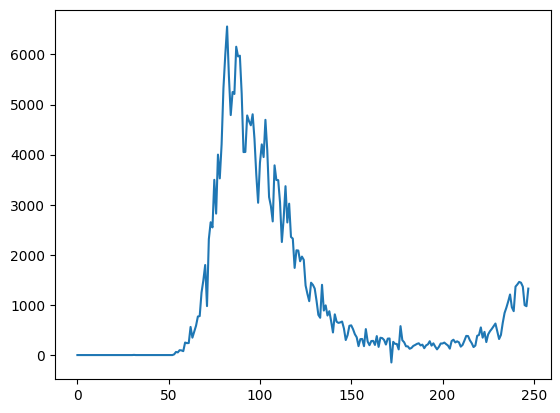

In [53]:
result_df.new_cases.plot()

In [ ]:
result_df.set_index("date", inplace=True)


In [58]:
print(result_df)
result_df.loc["2020-09-01"]

            new_cases  total_cases  new_deaths  total_deaths  new_tests  \
date                                                                      
2019-12-31        0.0          0.0         0.0           0.0        NaN   
2020-01-01        0.0          0.0         0.0           0.0        NaN   
2020-01-02        0.0          0.0         0.0           0.0        NaN   
2020-01-03        0.0          0.0         0.0           0.0        NaN   
2020-01-04        0.0          0.0         0.0           0.0        NaN   
...               ...          ...         ...           ...        ...   
2020-08-30     1444.0     266853.0         1.0       35473.0    53541.0   
2020-08-31     1365.0     268218.0         4.0       35477.0    42583.0   
2020-09-01      996.0     269214.0         6.0       35483.0    54395.0   
2020-09-02      975.0     270189.0         8.0       35491.0        NaN   
2020-09-03     1326.0     271515.0         6.0       35497.0        NaN   

            total_tests 

new_cases             9.960000e+02
total_cases           2.692140e+05
new_deaths            6.000000e+00
total_deaths          3.548300e+04
new_tests             5.439500e+04
total_tests           4.279456e+06
cases_per_million     4.452628e+03
deaths_per_million    5.868661e+02
tests_per_million     7.077947e+04
Name: 2020-09-01 00:00:00, dtype: float64

In [59]:
result_df.new_cases

date
2019-12-31       0.0
2020-01-01       0.0
2020-01-02       0.0
2020-01-03       0.0
2020-01-04       0.0
               ...  
2020-08-30    1444.0
2020-08-31    1365.0
2020-09-01     996.0
2020-09-02     975.0
2020-09-03    1326.0
Name: new_cases, Length: 248, dtype: float64

<Axes: xlabel='date'>

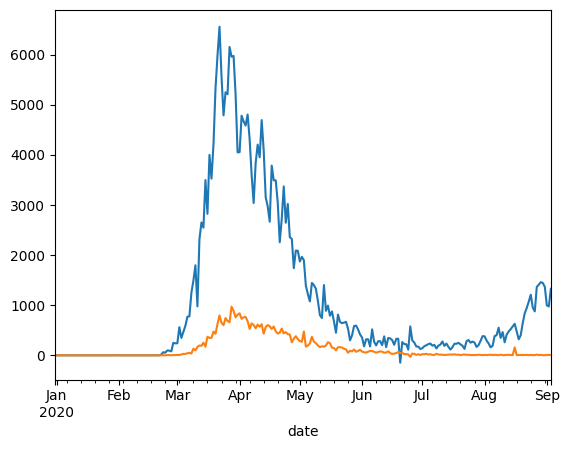

In [60]:
result_df.new_cases.plot()
result_df.new_deaths.plot()

<Axes: title={'center': 'Death Rate'}, xlabel='date'>

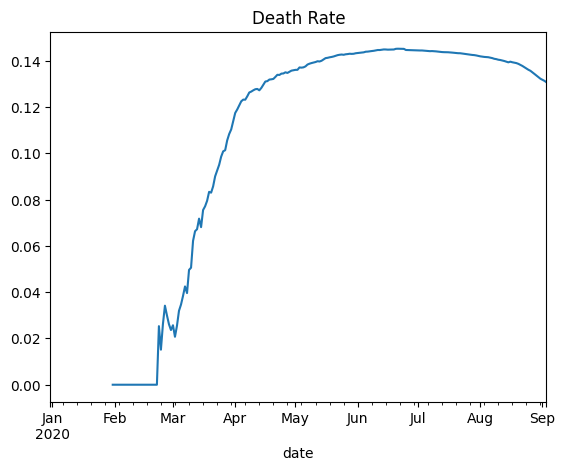

In [62]:
death_rate= result_df.total_deaths/result_df.total_cases
death_rate.plot(title="Death Rate")

<Axes: title={'center': 'Positive Rate'}, xlabel='date'>

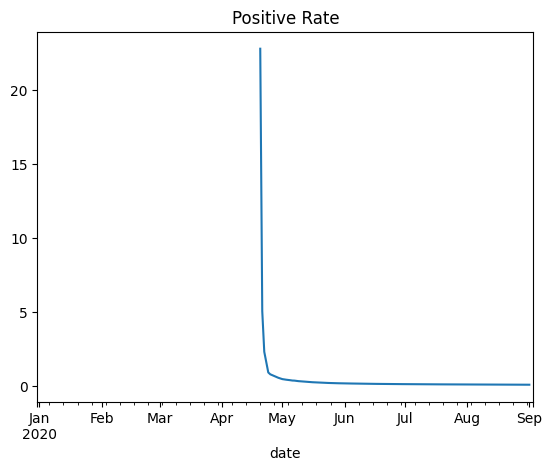

In [63]:
positive_rate=result_df.total_cases/result_df.total_tests
positive_rate.plot(title="Positive Rate")

<Axes: xlabel='month'>

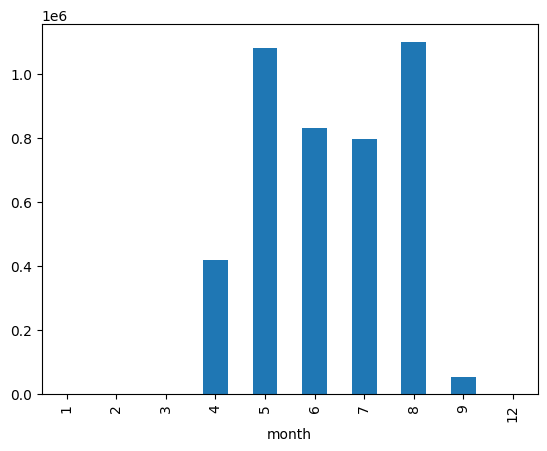

In [65]:
covid_month_df.new_tests.plot(kind="bar")

In [78]:
result_df["total_tests"].isna().sum()

113